In [ ]:
import numpy as np
import pandas 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
balance_data = pandas.read_csv("/content/drive/MyDrive/Colab Notebooks/DecisionTreee.csv")

print(balance_data)

          parents hasNursery      Form Children     Housing         Social  \
0           usual     proper  complete        1  convenient        nonprob   
1           usual     proper  complete        1  convenient        nonprob   
2           usual     proper  complete        1  convenient        nonprob   
3           usual     proper  complete        1  convenient  slightly_prob   
4           usual     proper  complete        1  convenient  slightly_prob   
...           ...        ...       ...      ...         ...            ...   
12955  great_pret  very_crit    foster     more    critical  slightly_prob   
12956  great_pret  very_crit    foster     more    critical  slightly_prob   
12957  great_pret  very_crit    foster     more    critical    problematic   
12958  great_pret  very_crit    foster     more    critical    problematic   
12959  great_pret  very_crit    foster     more    critical    problematic   

            Health       Class     Finance  
0      recommended

In [ ]:
d = {'usual': 0, 'pretentious': 1, 'great_pret': 2}
balance_data['parents'] = balance_data['parents'].map(d)

d1 = {'proper' : 0, 'less_proper':1, 'improper' : 2, 'critical' : 3, 'very_crit':4}
balance_data['hasNursery'] = balance_data['hasNursery'].map(d1)

d2 = {'complete' : 0, 'completed':1, 'incomplete' : 2, 'foster' : 3}
balance_data['Form'] = balance_data['Form'].map(d2)

d4=  {'convenient' : 0, 'less_conv':1, 'critical' : 2}
balance_data['Housing'] = balance_data['Housing'].map(d4)

d5= {'more' : 0, '1': 1, '2':2, '3':3}
balance_data['Children'] = balance_data['Children'].map(d5)

d6=  {'convenient' : 0, 'inconv':1}
balance_data['Finance'] = balance_data['Finance'].map(d6)

d7 = {'nonprob' : 0, 'slightly_prob':1, 'problematic' : 2}
balance_data['Social'] = balance_data['Social'].map(d7) 

d8 = {'recommended' : 0, 'priority':1, 'not_recom' : 2}
balance_data['Health'] = balance_data['Health'].map(d8)

d9 = {'not_recom': 0, 'recommend' : 1, 'very_recom' : 2, 'priority':3, 'spec_prior' : 4}
balance_data['Class'] = balance_data['Class'].map(d9)

print(balance_data)

       parents  hasNursery  Form  Children  Housing  Social  Health  Class  \
0            0           0     0         1        0       0       0      1   
1            0           0     0         1        0       0       1      3   
2            0           0     0         1        0       0       2      0   
3            0           0     0         1        0       1       0      1   
4            0           0     0         1        0       1       1      3   
...        ...         ...   ...       ...      ...     ...     ...    ...   
12955        2           4     3         0        2       1       1      4   
12956        2           4     3         0        2       1       2      0   
12957        2           4     3         0        2       2       0      4   
12958        2           4     3         0        2       2       1      4   
12959        2           4     3         0        2       2       2      0   

       Finance  
0            0  
1            0  
2           

In [ ]:
features = ['parents', 'hasNursery','Form', 'Children' ,'Housing','Social','Health',  'Class','Finance']

X = balance_data[features]
y = balance_data['Finance']

print(X)
print(y)

       parents  hasNursery  Form  Children  Housing  Social  Health  Class  \
0            0           0     0         1        0       0       0      1   
1            0           0     0         1        0       0       1      3   
2            0           0     0         1        0       0       2      0   
3            0           0     0         1        0       1       0      1   
4            0           0     0         1        0       1       1      3   
...        ...         ...   ...       ...      ...     ...     ...    ...   
12955        2           4     3         0        2       1       1      4   
12956        2           4     3         0        2       1       2      0   
12957        2           4     3         0        2       2       0      4   
12958        2           4     3         0        2       2       1      4   
12959        2           4     3         0        2       2       2      0   

       Finance  
0            0  
1            0  
2           

In [ ]:
X = balance_data.values[:, 0:7]
y = balance_data.values[:, 8]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)

X:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 2]
 ...
 [2 4 3 ... 2 2 0]
 [2 4 3 ... 2 2 1]
 [2 4 3 ... 2 2 2]] Y:  [0 0 0 ... 1 1 1]
X_train  [[0 4 1 ... 2 0 1]
 [2 2 3 ... 2 0 1]
 [0 0 3 ... 0 0 2]
 ...
 [1 4 1 ... 2 0 2]
 [1 3 0 ... 1 2 0]
 [1 1 2 ... 1 2 0]]  X-test  [[1 0 0 ... 0 0 2]
 [0 3 0 ... 1 1 2]
 [0 1 0 ... 0 0 1]
 ...
 [1 4 2 ... 0 1 0]
 [0 3 3 ... 1 2 1]
 [1 4 1 ... 1 1 2]]  y-train  [0 1 1 ... 1 0 0] y-test [0 0 1 ... 0 0 1]


In [77]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier(criterion = "entropy",random_state = 42, max_depth=6, min_samples_leaf=5)
dtree = dtree.fit(X_train, y_train )

In [78]:
y_pred = dtree.predict(X_test)
print("Predicted values:")
print(y_pred)


Predicted values:
[1 1 0 ... 0 1 0]


In [79]:
print("Confusion Matrix: ",
      confusion_matrix(y_test, y_pred))

print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
print("Report : ",
    classification_report(y_test, y_pred))

Confusion Matrix:  [[1035  864]
 [1328  661]]
Accuracy :  43.62139917695473
Report :                precision    recall  f1-score   support

           0       0.44      0.55      0.49      1899
           1       0.43      0.33      0.38      1989

    accuracy                           0.44      3888
   macro avg       0.44      0.44      0.43      3888
weighted avg       0.44      0.44      0.43      3888



[Text(0.5, 0.9285714285714286, 'Health <= 0.5\nentropy = 1.0\nsamples = 9072\nvalue = [4581, 4491]'),
 Text(0.25, 0.7857142857142857, 'hasNursery <= 0.5\nentropy = 1.0\nsamples = 3036\nvalue = [1557, 1479]'),
 Text(0.125, 0.6428571428571429, 'Social <= 0.5\nentropy = 0.999\nsamples = 602\nvalue = [314, 288]'),
 Text(0.0625, 0.5, 'Children <= 2.5\nentropy = 0.992\nsamples = 203\nvalue = [112, 91]'),
 Text(0.03125, 0.35714285714285715, 'Housing <= 0.5\nentropy = 0.995\nsamples = 155\nvalue = [84, 71]'),
 Text(0.015625, 0.21428571428571427, 'Children <= 0.5\nentropy = 1.0\nsamples = 54\nvalue = [27, 27]'),
 Text(0.0078125, 0.07142857142857142, 'entropy = 0.964\nsamples = 18\nvalue = [11, 7]'),
 Text(0.0234375, 0.07142857142857142, 'entropy = 0.991\nsamples = 36\nvalue = [16, 20]'),
 Text(0.046875, 0.21428571428571427, 'Form <= 0.5\nentropy = 0.988\nsamples = 101\nvalue = [57, 44]'),
 Text(0.0390625, 0.07142857142857142, 'entropy = 0.943\nsamples = 25\nvalue = [16, 9]'),
 Text(0.0546875, 0

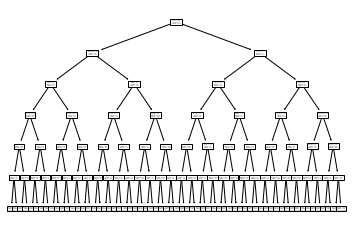

In [80]:
tree.plot_tree(dtree, feature_names=features)